<a href="https://colab.research.google.com/github/Sheetalm21/deep_learning/blob/assignment_3/Assessment3_que2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sheetal Mahajan_20MAI0066


Architecture
--Convolutional #1 outputs 28x28x6

      --Activation any activation function, we will relu

--Pooling #1 The output shape should be 14x14x6.

--Convolutional #2 outputs 10x10x16.

      --Activation any activation function, we will relu
--Pooling #2 outputs 5x5x16.

    --Flatten Flatten the output shape of the final pooling layer

--Fully Connected #1 outputs 120

      --Activation any activation function, we will relu

--Fully Connected #2 outputs 84

      --Activation any activation function, we will relu
--Fully Connected (Logits) #3 outpute 10

## Downloading Dataset


In [1]:
#mnist data--> Four files are available on this site, http://yann.lecun.com/exdb/mnist/:

from requests import get

def download_file(url, file_name):
    with open(file_name, "wb") as file:
        response = get(url)
        file.write(response.content)

In [2]:
download_file('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz', 'train-images-idx3-ubyte.gz')
download_file('http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz', 'train-labels-idx1-ubyte.gz')
download_file('http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz', 't10k-images-idx3-ubyte.gz')
download_file('http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz', 't10k-labels-idx1-ubyte.gz')

## Load the data

In [3]:
import gzip
import numpy as np
import pandas as pd
from time import time

from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
import keras.layers as layers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.callbacks import TensorBoard

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
def read_mnist(images_path: str, labels_path: str):
    with gzip.open(labels_path, 'rb') as labelsFile:
        labels = np.frombuffer(labelsFile.read(), dtype=np.uint8, offset=8)

    with gzip.open(images_path,'rb') as imagesFile:
        length = len(labels)
        # Load flat 28x28 px images (784 px), and convert them to 28x28 px
        features = np.frombuffer(imagesFile.read(), dtype=np.uint8, offset=16) \
                        .reshape(length, 784) \
                        .reshape(length, 28, 28, 1)
        
    return features, labels

In [5]:
train = {}
test = {}

train['features'], train['labels'] = read_mnist('train-images-idx3-ubyte.gz', 'train-labels-idx1-ubyte.gz')
test['features'], test['labels'] = read_mnist('t10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz')

## Explore the dataset

In [6]:
print('Number of training images:', train['features'].shape[0])
print('Number of test images:', test['features'].shape[0])

Number of training images: 60000
Number of test images: 10000


### Displaying some images from dataset

In [7]:
def display_image(position):
    image = train['features'][position].squeeze()
    plt.title('Example %d. Label: %d' % (position, train['labels'][position]))
    plt.imshow(image, cmap=plt.cm.gray_r)

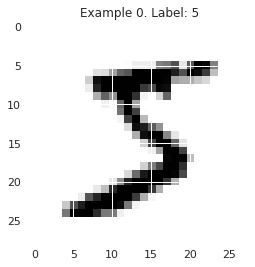

In [8]:
display_image(0)

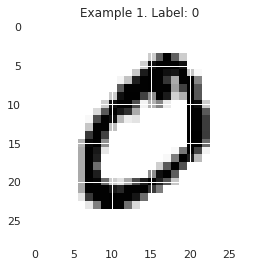

In [9]:
display_image(1)

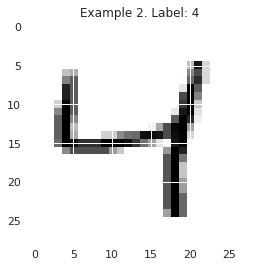

In [10]:
display_image(2)

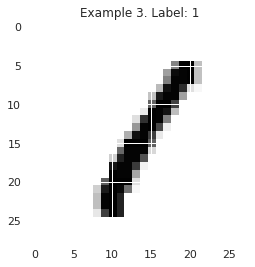

In [11]:
display_image(3)

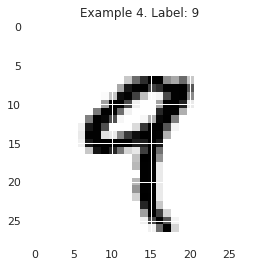

In [12]:
display_image(4)

### Plotting training data --> labels and count of training data

In [13]:
train_labels_count = np.unique(train['labels'], return_counts=True)
dataframe_train_labels = pd.DataFrame({'Label':train_labels_count[0], 'Count':train_labels_count[1]})
dataframe_train_labels

,Label,Count
0,0,5923
1,1,6742
2,2,5958
3,3,6131
4,4,5842
5,5,5421
6,6,5918
7,7,6265
8,8,5851
9,9,5949


### Splitting into training and validation set

In [14]:
validation = {}
train['features'], validation['features'], train['labels'], validation['labels'] = train_test_split(train['features'], train['labels'], test_size=0.2, random_state=0)

In [15]:
print('Number of training images:', train['features'].shape[0])
print('Number of validation images:', validation['features'].shape[0])

Number of training images: 48000
Number of validation images: 12000


In [16]:
print("Image Shape: {}".format(train['features'][0].shape))

Image Shape: (28, 28, 1)


## Preparing input features:
The LeNet architecture accepts a 32x32 pixel images as input, mnist data is 28x28 pixels. We simply pad the images with zeros to overcome that.

In [17]:
# Pad images with 0s
train['features']      = np.pad(train['features'], ((0,0),(2,2),(2,2),(0,0)), 'constant')
validation['features'] = np.pad(validation['features'], ((0,0),(2,2),(2,2),(0,0)), 'constant')
test['features']       = np.pad(test['features'], ((0,0),(2,2),(2,2),(0,0)), 'constant')
    
print("Updated Image Shape: {}".format(train['features'][0].shape))

Updated Image Shape: (32, 32, 1)


## Implementation:

In [23]:
model = keras.Sequential()
model.add(layers.Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=(32, 32, 1)))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.Conv2D(filters=16, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [24]:
model.build()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_7 (Dense)              (None, 84)               

### Checking Accuracy of the model

In [25]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [26]:
EPOCHS = 150
BATCH_SIZE = 150

In [27]:
X_train, y_train = train['features'], to_categorical(train['labels'])
X_validation, y_validation = validation['features'], to_categorical(validation['labels'])

train_generator = ImageDataGenerator().flow(X_train, y_train, batch_size=BATCH_SIZE)
validation_generator = ImageDataGenerator().flow(X_validation, y_validation, batch_size=BATCH_SIZE)

In [28]:
print('# of training images:', train['features'].shape[0])
print('# of validation images:', validation['features'].shape[0])

steps_per_epoch = X_train.shape[0]//BATCH_SIZE
validation_steps = X_validation.shape[0]//BATCH_SIZE

tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=EPOCHS, 
                    validation_data=validation_generator, validation_steps=validation_steps, 
                    shuffle=True, callbacks=[tensorboard])

# of training images: 48000
# of validation images: 12000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/150
320/320 [==============================] - 35s 9ms/step - loss: 4.1773 - accuracy: 0.7222 - val_loss: 0.2193 - val_accuracy: 0.9407
Epoch 2/150
320/320 [==============================] - 2s 6ms/step - loss: 0.1617 - accuracy: 0.9533 - val_loss: 0.1395 - val_accuracy: 0.9609
Epoch 3/150
320/320 [==============================] - 2s 6ms/step - loss: 0.1046 - accuracy: 0.9686 - val_loss: 0.1029 - val_accuracy: 0.9712
Epoch 4/150
320/320 [==============================] - 2s 6ms/step - loss: 0.0661 - accuracy: 0.9781 - val_loss: 0.1041 - val_accuracy: 0.9709
Epoch 5/150
320/320 [==============================] - 2s 5ms/step - loss: 0.0523 - accuracy: 0.9836 - val_loss: 0.0872 - val_accuracy: 0.9742
Epoch 6/150
320/320 [==============================] - 2s 5ms/step - loss: 0.0415 - accuracy: 0.9867 - val_loss: 0.0829 - val_accuracy: 0.9771
Epoch 7/150
320/320 [==============================] - 2s 5ms/step - loss: 0.0313 - accuracy: 0.9894 - val_loss: 0.0930 - val_accuracy: 0.975

In [29]:
score = model.evaluate(test['features'], to_categorical(test['labels']))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1837 - accuracy: 0.9877
Test loss: 0.18366175889968872
Test accuracy: 0.9876999855041504
